<a href="https://colab.research.google.com/github/ZainabIftikhar1204/CIFAR-Image-Classification/blob/main/Trained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries Needed

In [ ]:
# !pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import keras

# Importing the Dataset

In [ ]:
dataset, metadata = tfds.load(name='cifar10', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.0SSA8Z_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.0SSA8Z_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
classes = metadata.features['label'].names
print(f"The classes for the dataset are {classes}")

The classes for the dataset are ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Exploring the Data

In [ ]:
train_examples_num = metadata.splits['train'].num_examples
test_examples_num = metadata.splits['test'].num_examples
print(f"The number of training examples is {train_examples_num}")
print(f"The number of testing examples is {test_examples_num}")

The number of training examples is 50000
The number of testing examples is 10000


# Pre-processing the Data

In [ ]:
for img in train_dataset:
  img_tensor = img[0]
  img_label = img[1]
  break
print(f"The tensor of image looks like {img_tensor}")
print(f"The label for the image is {img_label}")

The tensor of image looks like [[[143  96  70]
  [141  96  72]
  [135  93  72]
  ...
  [ 96  37  19]
  [105  42  18]
  [104  38  20]]

 [[128  98  92]
  [146 118 112]
  [170 145 138]
  ...
  [108  45  26]
  [112  44  24]
  [112  41  22]]

 [[ 93  69  75]
  [118  96 101]
  [179 160 162]
  ...
  [128  68  47]
  [125  61  42]
  [122  59  39]]

 ...

 [[187 150 123]
  [184 148 123]
  [179 142 121]
  ...
  [198 163 132]
  [201 166 135]
  [207 174 143]]

 [[187 150 117]
  [181 143 115]
  [175 136 113]
  ...
  [201 164 132]
  [205 168 135]
  [207 171 139]]

 [[195 161 126]
  [187 153 123]
  [186 151 128]
  ...
  [212 177 147]
  [219 185 155]
  [221 187 157]]]
The label for the image is 7


In [ ]:
#defining a normalization function to normalize the images from 0-255 to 0-1
def normalize_img(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255
  return image, label

train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

#caching the data for faster training
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()


### Exploring the normalized images

In [ ]:
#Looking at normanlized images tensor
for img, label in train_dataset:
  print(f"The tensor of image looks like {img}")
  print(f"The shape of image is {img.shape}")
  print(f"The label for the image is {label}")
  break

The tensor of image looks like [[[0.56078434 0.3764706  0.27450982]
  [0.5529412  0.3764706  0.28235295]
  [0.5294118  0.3647059  0.28235295]
  ...
  [0.3764706  0.14509805 0.07450981]
  [0.4117647  0.16470589 0.07058824]
  [0.40784314 0.14901961 0.07843138]]

 [[0.5019608  0.38431373 0.36078432]
  [0.57254905 0.4627451  0.4392157 ]
  [0.6666667  0.5686275  0.5411765 ]
  ...
  [0.42352942 0.1764706  0.10196079]
  [0.4392157  0.17254902 0.09411765]
  [0.4392157  0.16078432 0.08627451]]

 [[0.3647059  0.27058825 0.29411766]
  [0.4627451  0.3764706  0.39607844]
  [0.7019608  0.627451   0.63529414]
  ...
  [0.5019608  0.26666668 0.18431373]
  [0.49019608 0.23921569 0.16470589]
  [0.47843137 0.23137255 0.15294118]]

 ...

 [[0.73333335 0.5882353  0.48235294]
  [0.72156864 0.5803922  0.48235294]
  [0.7019608  0.5568628  0.4745098 ]
  ...
  [0.7764706  0.6392157  0.5176471 ]
  [0.7882353  0.6509804  0.5294118 ]
  [0.8117647  0.68235296 0.56078434]]

 [[0.73333335 0.5882353  0.45882353]
  [0.7

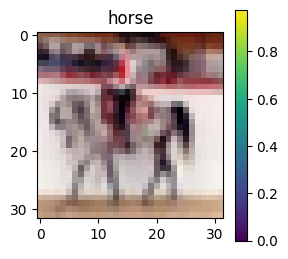

In [ ]:
# Looking at one example
plt.figure(figsize=(3,3))
img = img.numpy().reshape(32,32,3)
plt.imshow(img)
plt.colorbar()
plt.title(classes[label.numpy()])
plt.show()

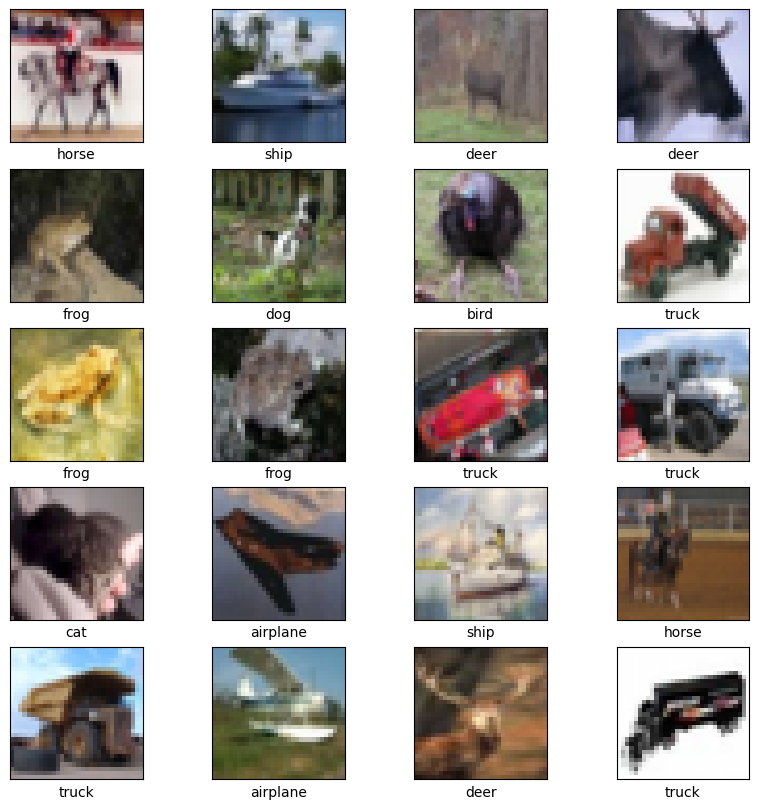

In [ ]:
#Looking at first 20 images
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(20)):
  # image = image.numpy().reshape(32,32,3)
  label_name = classes[label.numpy()]
  plt.subplot(5,4,i+1)
  plt.grid(False)
  plt.xticks([]) #getting rid of grid markings
  plt.yticks([])
  plt.imshow(image)
  plt.xlabel(classes[label])

plt.show()

# CNN

##### Building the Model

In [ ]:
cnn = tf.keras.Sequential([
    #convolution layers
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPooling2D((2, 2)),


    #dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

##### Compiling the model

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

##### Training the model

In [ ]:
BATCH_SIZE = 64
train_dataset = train_dataset.repeat().shuffle(train_examples_num).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
cnn.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(train_examples_num/BATCH_SIZE))

Epoch 1/20
782/782 [==============================] - 21s 10ms/step - loss: 1.8724 - accuracy: 0.2896
Epoch 2/20
782/782 [==============================] - 8s 10ms/step - loss: 1.4719 - accuracy: 0.4613
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 1.3338 - accuracy: 0.5134
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2321 - accuracy: 0.5572
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 1.1719 - accuracy: 0.5809
Epoch 6/20
782/782 [==============================] - 8s 10ms/step - loss: 1.1367 - accuracy: 0.5959
Epoch 7/20
782/782 [==============================] - 8s 10ms/step - loss: 1.0930 - accuracy: 0.6107
Epoch 8/20
782/782 [==============================] - 8s 10ms/step - loss: 1.0649 - accuracy: 0.6241
Epoch 9/20
782/782 [==============================] - 8s 10ms/step - loss: 1.0371 - accuracy: 0.6336
Epoch 10/20
782/782 [==============================] - 8s 10ms/step - loss: 1.0202 - accura

##### Evaluating the model

In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_dataset, steps=math.ceil(test_examples_num/BATCH_SIZE))
print('CNN Accuracy on test dataset:', test_accuracy)

157/157 [==============================] - 2s 13ms/step - loss: 0.8691 - accuracy: 0.6961
CNN Accuracy on test dataset: 0.6960999965667725


##### Saving the model

In [ ]:
cnn.save("cnn_cifar10.keras")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_cnn_model = keras.models.load_model("cnn_cifar10.keras")

# Let's check:
np.testing.assert_allclose(
    cnn.predict(test_dataset), reconstructed_cnn_model.predict(test_dataset)
)

157/157 [==============================] - 1s 3ms/step


##### Making Predictions

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = reconstructed_cnn_model.predict(test_images)
predictions.shape

2/2 [==============================] - 0s 8ms/step


(64, 10)

In [ ]:
pred_label = predictions[0]
actual_label = test_labels[0]
print(f"The predicted label is {classes[np.argmax(pred_label)]}")
print(f"The actual label is {classes[actual_label]}")

The predicted label is bird
The actual label is horse


##### Visualizing predictions

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

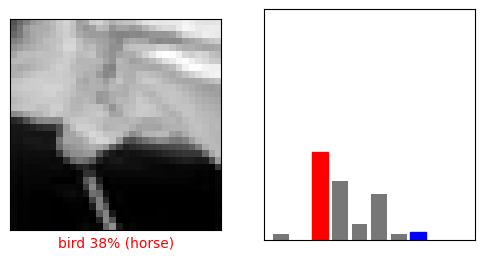

In [ ]:
#prediction for 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

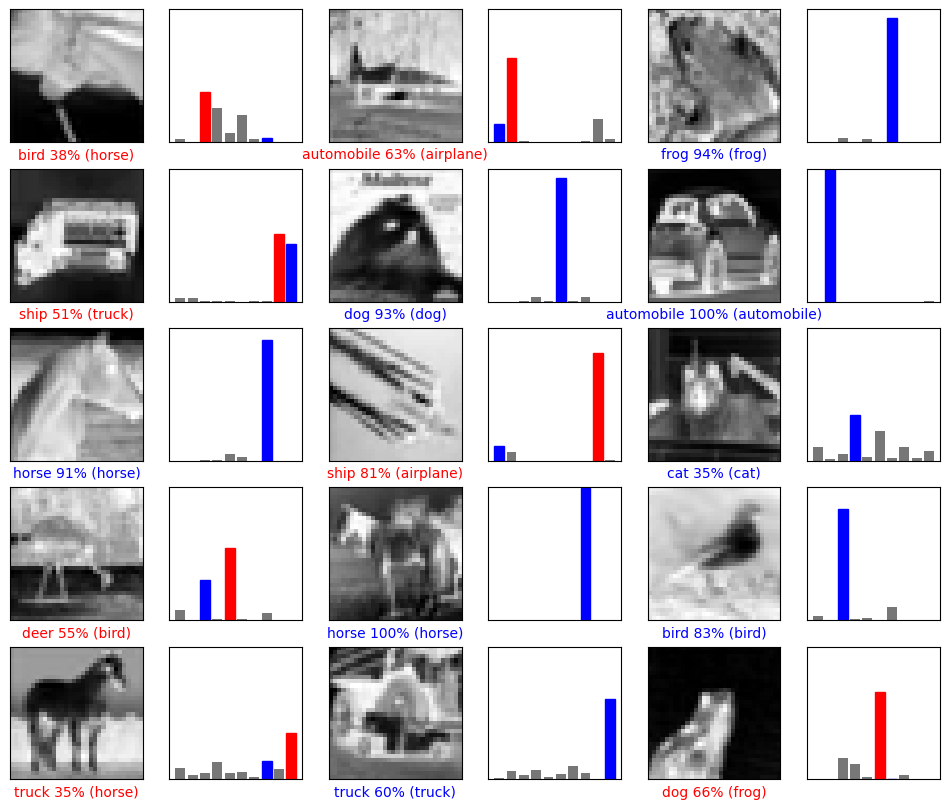

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
